In [1]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
FEATURE_SPACE_FILE_PATH='feature_space.csv'

FEATURES_COUNT = 128
TEST_PORTION = 0.2
RANDOM_STATE = 31

metrics = {}

In [3]:
df = pd.read_csv(FEATURE_SPACE_FILE_PATH)
original_dimensions_count = df.shape[0]-1
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,78,57,35,74,119,116,83,44,52,89,...,0,0,0,0,0,0,0,0,0,2
1,217,221,210,208,216,218,219,219,219,223,...,181,186,178,179,177,189,187,185,182,1
2,0,0,0,0,0,0,0,0,0,0,...,103,97,100,101,102,100,100,103,106,3


In [4]:
pcal = PCA(n_components=FEATURES_COUNT)
score1 = pcal.fit_transform(df.iloc[:,0:256])
fspace = pd.DataFrame(score1)
fspace.head(3)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-659.783386,-374.586635,281.360855,103.785598,84.291535,82.685287,-64.332086,54.774488,-37.474944,233.563621,...,-0.539493,11.445308,7.006604,11.142497,-19.615106,17.539984,7.155219,-10.895921,1.252962,3.137658
1,2149.275221,-206.313727,-60.841166,-42.150262,113.335359,3.562527,45.469463,-10.611842,-20.746470,-30.848712,...,9.585394,15.774336,-4.699885,6.883365,13.528569,0.404363,28.255368,-0.703119,-10.836206,-16.952301
2,540.717173,566.608215,2.086639,-228.249106,-387.001927,27.123104,30.382686,110.971659,-25.386110,2.970760,...,-9.520412,-6.281971,3.690710,6.500534,-3.211761,-1.249549,-1.730661,7.184561,2.319478,5.765993


In [5]:
fspace = pd.concat([fspace, df.iloc[:,-1]],axis=1)
fspace.rename(columns={'256':128}, inplace=True)
fspace.head(3)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-659.783386,-374.586635,281.360855,103.785598,84.291535,82.685287,-64.332086,54.774488,-37.474944,233.563621,...,11.445308,7.006604,11.142497,-19.615106,17.539984,7.155219,-10.895921,1.252962,3.137658,2
1,2149.275221,-206.313727,-60.841166,-42.150262,113.335359,3.562527,45.469463,-10.611842,-20.746470,-30.848712,...,15.774336,-4.699885,6.883365,13.528569,0.404363,28.255368,-0.703119,-10.836206,-16.952301,1
2,540.717173,566.608215,2.086639,-228.249106,-387.001927,27.123104,30.382686,110.971659,-25.386110,2.970760,...,-6.281971,3.690710,6.500534,-3.211761,-1.249549,-1.730661,7.184561,2.319478,5.765993,3


In [6]:
fspace.shape

(34089, 129)

In [7]:
# List of features spaces per class
fspaces = [fspace[fspace.iloc[:,FEATURES_COUNT] == i+1] for i in range(len(fspace.iloc[:, -1].unique()))]
len(fspaces)

3

In [8]:
# Number of observations per class
print([len(c_fspace) for c_fspace in fspaces])

[11363, 11363, 11363]


In [9]:
# Split the data
train_data_x, test_data_x, train_data_y, test_data_y = train_test_split(
    fspace.iloc[:, :-1], fspace.iloc[:, -1], test_size=TEST_PORTION, random_state=RANDOM_STATE)
print(f'Train data shape: {train_data_x.shape}')
print(f'Train label shape: {train_data_y.shape}')
print(f'Test data shape: {test_data_x.shape}')
print(f'Test label shape: {test_data_y.shape}')

Train data shape: (27271, 128)
Train label shape: (27271,)
Test data shape: (6818, 128)
Test label shape: (6818,)


In [10]:
FEATURE_1 = 10
FEATURE_2 = 110

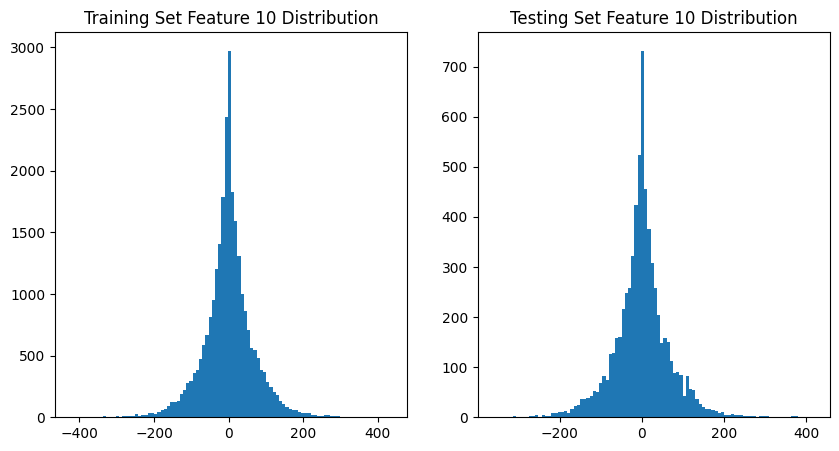

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Plot the histograms on the two subplots
axes[0].hist(train_data_x[train_data_x != 0].iloc[:, FEATURE_1], bins=100)
axes[1].hist(test_data_x[test_data_x != 0].iloc[:, FEATURE_1], bins=100)

# Set titles and labels
axes[0].set_title(f'Training Set Feature {FEATURE_1} Distribution')
axes[1].set_title(f'Testing Set Feature {FEATURE_1} Distribution')

# Show the plots
plt.show()

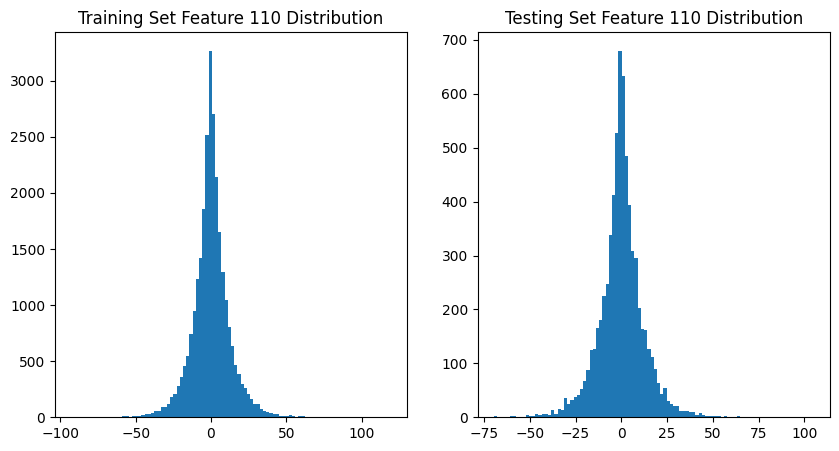

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Plot the histograms on the two subplots
axes[0].hist(train_data_x[train_data_x != 0].iloc[:, FEATURE_2], bins=100)
axes[1].hist(test_data_x[test_data_x != 0].iloc[:, FEATURE_2], bins=100)

# Set titles and labels
axes[0].set_title(f'Training Set Feature {FEATURE_2} Distribution')
axes[1].set_title(f'Testing Set Feature {FEATURE_2} Distribution')

# Show the plots
plt.show()

In [13]:
SUBSET_SIZE = 1000

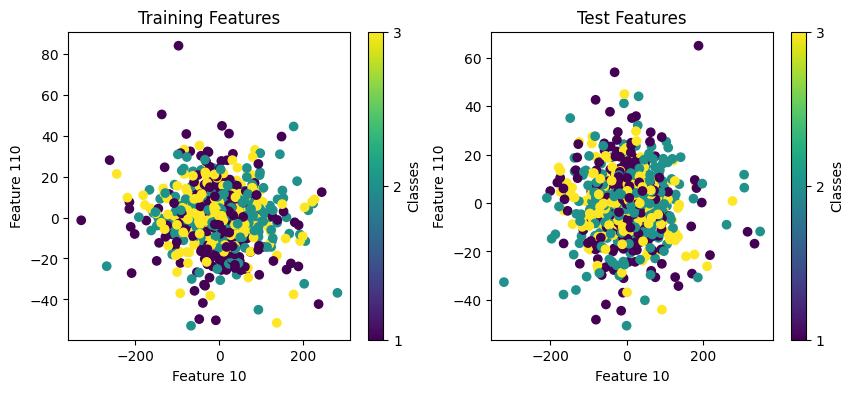

In [14]:
# Create a figure with two subplots arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


# Plot the first scatterplot on the first subplot
scatter1 = axes[0].scatter(train_data_x.iloc[:, FEATURE_1][:SUBSET_SIZE],
                           train_data_x.iloc[:, FEATURE_2][:SUBSET_SIZE],
                           c=train_data_y[:SUBSET_SIZE],
                           cmap='viridis',
                           marker='o')
axes[0].set_xlabel(f'Feature {FEATURE_1}')
axes[0].set_ylabel(f'Feature {FEATURE_2}')

# Plot the second scatterplot on the second subplot
scatter2 = axes[1].scatter(test_data_x.iloc[:, FEATURE_1][:SUBSET_SIZE],
                           test_data_x.iloc[:, FEATURE_2][:SUBSET_SIZE],
                           c=test_data_y[:SUBSET_SIZE],
                           cmap='viridis',
                           marker='o')
axes[1].set_xlabel(f'Feature {FEATURE_1}')
axes[1].set_ylabel(f'Feature {FEATURE_2}')

# Set titles for the subplots
axes[0].set_title('Training Features')
axes[1].set_title('Test Features')

# Add colorbars to each subplot
colorbar1 = plt.colorbar(scatter1, ax=axes[0])
colorbar2 = plt.colorbar(scatter2, ax=axes[1])
# Set labels for the colorbars
colorbar1.set_label('Classes')
colorbar2.set_label('Classes')
# Set the colorbar ticks and labels to discrete values
colorbar1.set_ticks([1, 2, 3])  # Define the tick positions
colorbar2.set_ticks([1, 2, 3])  # Define the tick positions


# Show the plots
plt.show()

In [15]:
fspace.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128],
      dtype='int64', length=129)

In [16]:
fspace_c1_c2 = fspace[fspace.iloc[:,-1] != 3]
fspace_c1_c3 = fspace[fspace.iloc[:, -1] != 2]
fspace_c2_c3 = fspace[fspace.iloc[:, -1] != 1]

In [17]:
train_data_c1_c2_x, test_data_c1_c2_x, train_data_c1_c2_y, test_data_c1_c2_y = train_test_split(
    fspace_c1_c2.iloc[:, :-1], fspace_c1_c2.iloc[:, -1], test_size=TEST_PORTION, random_state=RANDOM_STATE)
train_data_c1_c3_x, test_data_c1_c3_x, train_data_c1_c3_y, test_data_c1_c3_y = train_test_split(
    fspace_c1_c3.iloc[:, :-1], fspace_c1_c3.iloc[:, -1], test_size=TEST_PORTION, random_state=RANDOM_STATE)
train_data_c2_c3_x, test_data_c2_c3_x, train_data_c2_c3_y, test_data_c2_c3_y = train_test_split(fspace_c2_c3.iloc[:, :-1], fspace_c2_c3.iloc[:,-1], test_size=TEST_PORTION, random_state=RANDOM_STATE)

In [41]:
from sklearn.linear_model import LogisticRegression


lasso_model_c1_c2 = LogisticRegression(
    penalty='l1', solver='saga', multi_class='ovr', random_state=RANDOM_STATE)

lasso_model_c1_c3 = LogisticRegression(
    penalty='l1', solver='saga', multi_class='ovr', random_state=RANDOM_STATE)

lasso_model_c2_c3 = LogisticRegression(
    penalty='l1', solver='saga', multi_class='ovr', random_state=RANDOM_STATE)

lasso_model_c123 = LogisticRegression(
    penalty='l1', solver='saga', multi_class='multinomial', random_state=RANDOM_STATE)

In [42]:
lasso_model_c1_c2.fit(train_data_c1_c2_x,
                      train_data_c1_c2_y,)
lasso_model_c1_c3.fit(train_data_c1_c3_x,
                      train_data_c1_c3_y)
lasso_model_c2_c3.fit(train_data_c2_c3_x,
                      train_data_c2_c3_y)
lasso_model_c123.fit(train_data_x, train_data_y);

c:\Users\mosta\Workspace\UNCG - CSC-610 Big Data and Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mosta\Workspace\UNCG - CSC-610 Big Data and Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [43]:
pred_c1_c2_y = lasso_model_c1_c2.predict(test_data_c1_c2_x)
pred_c1_c3_y = lasso_model_c1_c3.predict(test_data_c1_c3_x)
pred_c2_c3_y = lasso_model_c2_c3.predict(test_data_c2_c3_x)
pred_c123_y = lasso_model_c123.predict(test_data_x)

In [44]:
fspace_c1_c2_results = pd.DataFrame(test_data_c1_c2_x)
fspace_c1_c2_results[FEATURES_COUNT] = test_data_c1_c2_y
fspace_c1_c2_results[FEATURES_COUNT+1] = pred_c1_c2_y.round().astype(int)

fspace_c1_c3_results = pd.DataFrame(test_data_c1_c3_x)
fspace_c1_c3_results[FEATURES_COUNT] = test_data_c1_c3_y
fspace_c1_c3_results[FEATURES_COUNT +
                     1] = pred_c1_c3_y.round().astype(int)

fspace_c2_c3_results = pd.DataFrame(test_data_c2_c3_x)
fspace_c2_c3_results[FEATURES_COUNT] = test_data_c2_c3_y
fspace_c2_c3_results[FEATURES_COUNT +
                     1] = pred_c2_c3_y.round().astype(int)

fspace_c123_results = pd.DataFrame(test_data_x)
fspace_c123_results[FEATURES_COUNT] = test_data_y
fspace_c123_results[FEATURES_COUNT +
                    1] = pred_c123_y.round().astype(int)

In [45]:
print(fspace_c1_c2_results.shape)
fspace_c1_c2_results.head(3)

(4546, 130)


,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
25952,-1070.605239,-8.806917,0.246535,12.804082,-49.596835,1.332409,-18.997980,1.398461,4.449055,6.329442,...,1.808716,-0.874856,-0.844811,-0.863536,-0.114061,0.753532,1.490516,0.880650,1,2
15457,-1068.662529,-7.014574,-3.123334,16.369299,-47.715050,1.704848,-15.234949,3.743816,4.884743,4.230452,...,4.007784,-0.141353,0.467645,-3.660816,2.159230,-1.257556,2.362937,0.602501,2,2
21758,1979.287664,-165.642824,-136.496885,-3.024571,121.777117,13.447778,14.399266,-18.372839,13.317640,4.219355,...,7.697753,-1.540039,19.617527,2.937276,-9.000064,-5.091761,1.054308,7.466929,1,1


Specificity: 0.7424892703862661
False Positive Rate: 0.2575107296137339
Accuracy: 0.8326000879894413
Precision: 0.9148598625066102
Recall: 0.7424892703862661


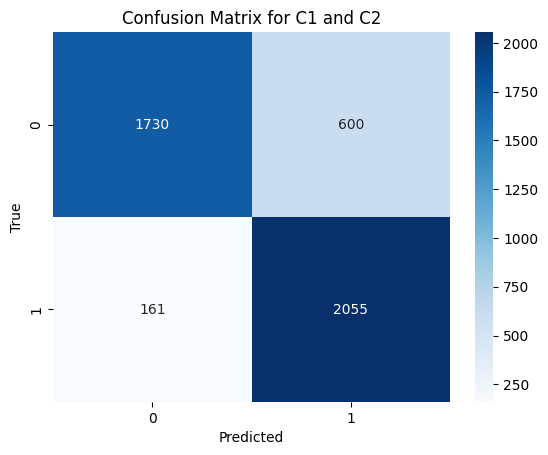

In [46]:
c1_c2_conf_matrix = confusion_matrix(
    fspace_c1_c2_results[FEATURES_COUNT], fspace_c1_c2_results[FEATURES_COUNT+1])
confusion_c1_c2_df = pd.DataFrame(c1_c2_conf_matrix, columns=[
                                  'Predicted C1', 'Predicted C2'], index=['True C1', 'True C2'])


TP, TN, FP, FN = c1_c2_conf_matrix[1, 1], c1_c2_conf_matrix[0,
                                                            0], c1_c2_conf_matrix[0, 1], c1_c2_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c1_c2_results.iloc[:, FEATURES_COUNT], fspace_c1_c2_results.iloc[:, FEATURES_COUNT+1])
precision = precision_score(
    fspace_c1_c2_results.iloc[:, FEATURES_COUNT], fspace_c1_c2_results.iloc[:, FEATURES_COUNT+1])
recall = recall_score(
    fspace_c1_c2_results.iloc[:, FEATURES_COUNT], fspace_c1_c2_results.iloc[:, FEATURES_COUNT+1])

metrics['Lasso C1C2'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                         'accuracy': accuracy, 'precision': precision, 'recall': recall}

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


sns.heatmap(c1_c2_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C1 and C2')
plt.show()

Specificity: 0.7209831588529814
False Positive Rate: 0.27901684114701863
Accuracy: 0.6656401231852178
Precision: 0.668796182070539
Recall: 0.6674307024575677


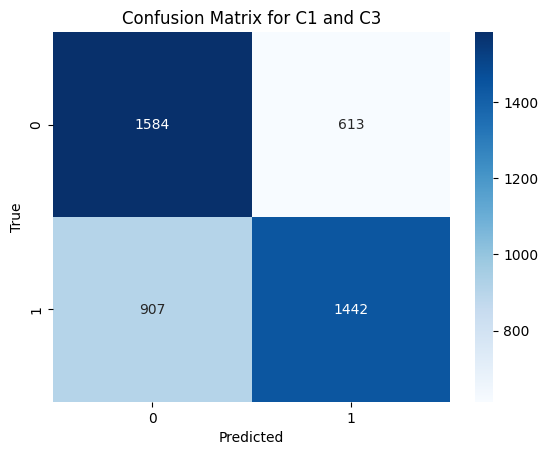

In [47]:
c1_c3_conf_matrix = confusion_matrix(
    fspace_c1_c3_results[FEATURES_COUNT], fspace_c1_c3_results[FEATURES_COUNT+1], labels=fspace_c1_c3_results[FEATURES_COUNT].unique())
confusion_c1_c3_df = pd.DataFrame(c1_c3_conf_matrix, columns=[
                                  'Predicted C1', 'Predicted C3'], index=['True C1', 'True C3'])

TP, TN, FP, FN = c1_c3_conf_matrix[1, 1], c1_c3_conf_matrix[0,
                                                            0], c1_c3_conf_matrix[0, 1], c1_c3_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c1_c3_results.iloc[:, FEATURES_COUNT], fspace_c1_c3_results.iloc[:, FEATURES_COUNT+1])
precision = precision_score(
    fspace_c1_c3_results.iloc[:, FEATURES_COUNT], fspace_c1_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')
recall = recall_score(
    fspace_c1_c3_results.iloc[:, FEATURES_COUNT], fspace_c1_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')

metrics['Lasso C1C3'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                         'accuracy': accuracy, 'precision': precision, 'recall': recall}

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

sns.heatmap(c1_c3_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C1 and C3')
plt.show()

Specificity: 0.9075372480280456
False Positive Rate: 0.09246275197195443
Accuracy: 0.6781786185657721
Precision: 0.7253527226306702
Recall: 0.6772668572295705


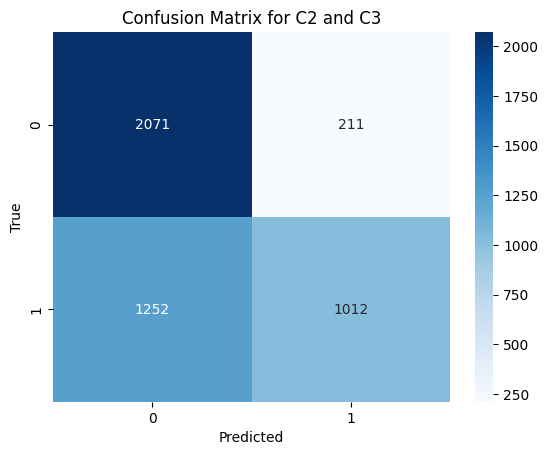

In [48]:
c2_c3_conf_matrix = confusion_matrix(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1])
confusion_c2_c3_df = pd.DataFrame(c2_c3_conf_matrix, columns=[
                                  'Predicted C2', 'Predicted C3'], index=['True C2', 'True C3'])


TP, TN, FP, FN = c2_c3_conf_matrix[1, 1], c2_c3_conf_matrix[0,
                                                            0], c2_c3_conf_matrix[0, 1], c2_c3_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1])
precision = precision_score(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')
recall = recall_score(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')

metrics['Lasso C2C3'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                         'accuracy': accuracy, 'precision': precision, 'recall': recall}

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

sns.heatmap(c2_c3_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C2 and C3')
plt.show()

In [49]:
print(fspace_c123_results.iloc[:, FEATURES_COUNT].value_counts())
print(fspace_c123_results.iloc[:, FEATURES_COUNT+1].value_counts())

128
1    2279
3    2271
2    2268
Name: count, dtype: int64
129
2    3863
1    2587
3     368
Name: count, dtype: int64


Specificity: 0.7496510004653327
False Positive Rate: 0.25034899953466727
Accuracy: 0.5566148430624817


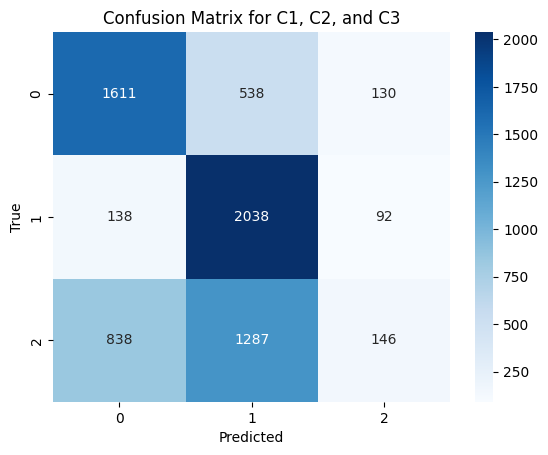

In [50]:
c123_conf_matrix = confusion_matrix(
    fspace_c123_results.iloc[:, FEATURES_COUNT], fspace_c123_results.iloc[:, FEATURES_COUNT+1], labels=[1,2,3])
confusion_c123_df = pd.DataFrame(c123_conf_matrix, columns=[
                                 'Predicted C1', 'Predicted C2', 'Predicted C3'], index=['True C1', 'True C2', 'True C3'])


TP, TN, FP, FN = c123_conf_matrix[1, 1], c123_conf_matrix[0,
                                                          0], c123_conf_matrix[0, 1], c123_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c123_results.iloc[:, FEATURES_COUNT], fspace_c123_results.iloc[:, FEATURES_COUNT+1])

metrics['Lasso C123'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                         'accuracy': accuracy, 'precision': None, 'recall': None}

print("Accuracy:", accuracy)

sns.heatmap(c123_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C1, C2, and C3')
plt.show()

Text(0.5, 1.0, 'C1, C2 and C3')

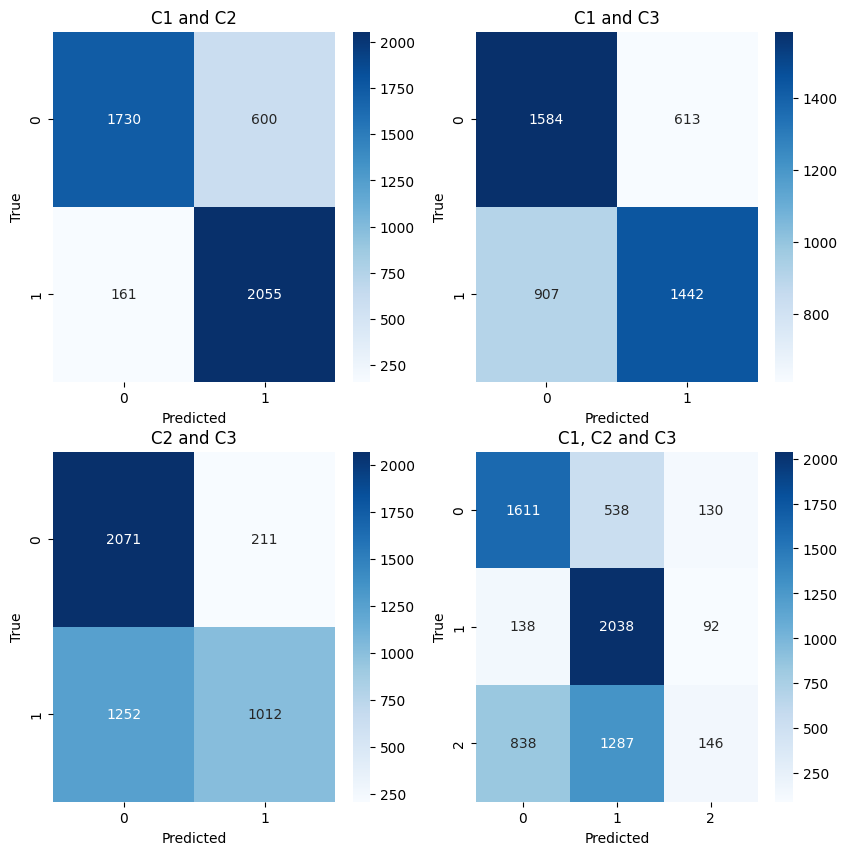

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.heatmap(c1_c2_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')
axes[0, 0].set_title('C1 and C2')
sns.heatmap(c1_c3_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')
axes[0, 1].set_title('C1 and C3')
sns.heatmap(c2_c3_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')
axes[1, 0].set_title('C2 and C3')
sns.heatmap(c123_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')
axes[1, 1].set_title('C1, C2 and C3')

In [52]:
N_ESTIMATORS = 100

In [53]:
# RandomForestClassifier
rf_c1_c2_model = RandomForestClassifier(
    n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
rf_c1_c3_model = RandomForestClassifier(
    n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
rf_c2_c3_model = RandomForestClassifier(
    n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
rf_c123_model = RandomForestClassifier(
    n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)

In [54]:
rf_c1_c2_model.fit(train_data_c1_c2_x, train_data_c1_c2_y)
rf_c1_c3_model.fit(train_data_c1_c3_x, train_data_c1_c3_y)
rf_c2_c3_model.fit(train_data_c2_c3_x, train_data_c2_c3_y)
rf_c123_model.fit(train_data_x, train_data_y)

RandomForestClassifier(random_state=31)

In [55]:
pred_c1_c2_y = rf_c1_c2_model.predict(
    test_data_c1_c2_x.iloc[:, :FEATURES_COUNT])
pred_c1_c3_y = rf_c1_c3_model.predict(
    test_data_c1_c3_x.iloc[:, :FEATURES_COUNT])
pred_c2_c3_y = rf_c2_c3_model.predict(
    test_data_c2_c3_x.iloc[:, :FEATURES_COUNT])
pred_c123_y = rf_c123_model.predict(test_data_x.iloc[:, :FEATURES_COUNT])

In [56]:
fspace_c1_c2_results = pd.DataFrame(test_data_c1_c2_x)
fspace_c1_c2_results[FEATURES_COUNT] = test_data_c1_c2_y
fspace_c1_c2_results[FEATURES_COUNT+1] = pred_c1_c2_y.round().astype(int)

fspace_c1_c3_results = pd.DataFrame(test_data_c1_c3_x)
fspace_c1_c3_results[FEATURES_COUNT] = test_data_c1_c3_y
fspace_c1_c3_results[FEATURES_COUNT +
                     1] = pred_c1_c3_y.round().astype(int)

fspace_c2_c3_results = pd.DataFrame(test_data_c2_c3_x)
fspace_c2_c3_results[FEATURES_COUNT] = test_data_c2_c3_y
fspace_c2_c3_results[FEATURES_COUNT +
                     1] = pred_c2_c3_y.round().astype(int)

fspace_c123_results = pd.DataFrame(test_data_x)
fspace_c123_results[FEATURES_COUNT] = test_data_y
fspace_c123_results[FEATURES_COUNT +
                    1] = pred_c123_y.round().astype(int)

Specificity: 0.9515021459227467
False Positive Rate: 0.04849785407725322
Accuracy: 0.9650241970963485
Precision: 0.9796730004418913
Recall: 0.9515021459227467


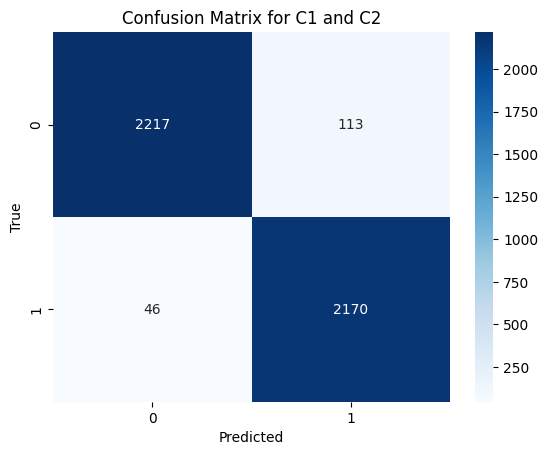

In [57]:
c1_c2_conf_matrix = confusion_matrix(
    fspace_c1_c2_results.iloc[:, FEATURES_COUNT], fspace_c1_c2_results.iloc[:, FEATURES_COUNT+1])
confusion_c1_c2_df = pd.DataFrame(c1_c2_conf_matrix, columns=[
                                  'Predicted C1', 'Predicted C2'], index=['True C1', 'True C2'])


TP, TN, FP, FN = c1_c2_conf_matrix[1, 1], c1_c2_conf_matrix[0,
                                                            0], c1_c2_conf_matrix[0, 1], c1_c2_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c1_c2_results.iloc[:, FEATURES_COUNT], fspace_c1_c2_results.iloc[:, FEATURES_COUNT+1])
precision = precision_score(
    fspace_c1_c2_results.iloc[:, FEATURES_COUNT], fspace_c1_c2_results.iloc[:, FEATURES_COUNT+1])
recall = recall_score(
    fspace_c1_c2_results.iloc[:, FEATURES_COUNT], fspace_c1_c2_results.iloc[:, FEATURES_COUNT+1])

metrics['RF C1C2'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                         'accuracy': accuracy, 'precision': precision, 'recall': recall}

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


sns.heatmap(c1_c2_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C1 and C2')
plt.show()

Specificity: 0.9349112426035503
False Positive Rate: 0.0650887573964497
Accuracy: 0.9445666520017598
Precision: 0.9447993172473614
Recall: 0.9442542590199531


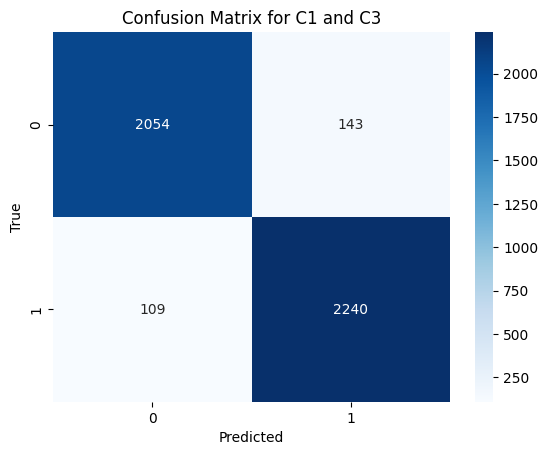

In [58]:
c1_c3_conf_matrix = confusion_matrix(
    fspace_c1_c3_results.iloc[:, FEATURES_COUNT], fspace_c1_c3_results.iloc[:, FEATURES_COUNT+1])
confusion_c1_c3_df = pd.DataFrame(c1_c3_conf_matrix, columns=[
                                  'Predicted C1', 'Predicted C3'], index=['True C1', 'True C3'])

TP, TN, FP, FN = c1_c3_conf_matrix[1, 1], c1_c3_conf_matrix[0,
                                                            0], c1_c3_conf_matrix[0, 1], c1_c3_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c1_c3_results.iloc[:, FEATURES_COUNT], fspace_c1_c3_results.iloc[:, FEATURES_COUNT+1])
precision = precision_score(
    fspace_c1_c3_results.iloc[:, FEATURES_COUNT], fspace_c1_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')
recall = recall_score(
    fspace_c1_c3_results.iloc[:, FEATURES_COUNT], fspace_c1_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')

metrics['RF C1C3'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                      'accuracy': accuracy, 'precision': precision, 'recall': recall}

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

sns.heatmap(c1_c3_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C1 and C3')
plt.show()

Specificity: 0.9460999123575811
False Positive Rate: 0.05390008764241893
Accuracy: 0.9274087109546855
Precision: 0.9280442740040482
Recall: 0.9273344084756103


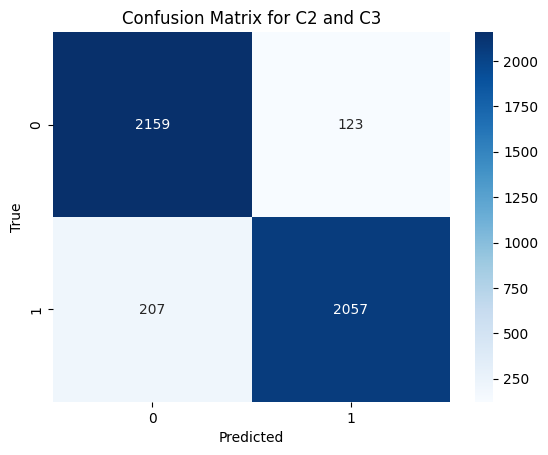

In [59]:
c2_c3_conf_matrix = confusion_matrix(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1])
confusion_c2_c3_df = pd.DataFrame(c2_c3_conf_matrix, columns=[
                                  'Predicted C2', 'Predicted C3'], index=['True C2', 'True C3'])


TP, TN, FP, FN = c2_c3_conf_matrix[1, 1], c2_c3_conf_matrix[0,
                                                            0], c2_c3_conf_matrix[0, 1], c2_c3_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1])
precision = precision_score(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')
recall = recall_score(
    fspace_c2_c3_results.iloc[:, FEATURES_COUNT], fspace_c2_c3_results.iloc[:, FEATURES_COUNT+1], average='macro')

metrics['RF C2C3'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                         'accuracy': accuracy, 'precision': precision, 'recall': recall}

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

sns.heatmap(c2_c3_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C2 and C3')
plt.show()

Specificity: 0.9617863720073665
False Positive Rate: 0.03821362799263352
Accuracy: 0.9049574655324142


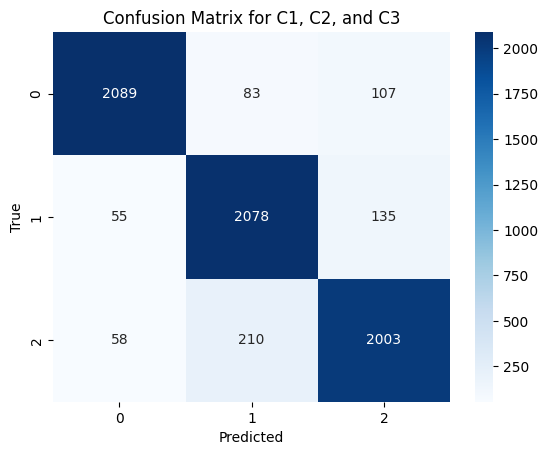

In [60]:
c123_conf_matrix = confusion_matrix(
    fspace_c123_results.iloc[:, FEATURES_COUNT], fspace_c123_results.iloc[:, FEATURES_COUNT+1])
confusion_c123_df = pd.DataFrame(c123_conf_matrix, columns=[
                                 'Predicted C1', 'Predicted C2', 'Predicted C3'], index=['True C1', 'True C2', 'True C3'])


TP, TN, FP, FN = c123_conf_matrix[1, 1], c123_conf_matrix[0,
                                                          0], c123_conf_matrix[0, 1], c123_conf_matrix[1, 0]

specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)

print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

accuracy = accuracy_score(
    fspace_c123_results.iloc[:, FEATURES_COUNT], fspace_c123_results.iloc[:, FEATURES_COUNT+1])

metrics['RF C123'] = {'specificity': specificity, 'falsePositiveRate': false_positive_rate,
                         'accuracy': accuracy, 'precision': None, 'recall': None}

print("Accuracy:", accuracy)

sns.heatmap(c123_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for C1, C2, and C3')
plt.show()

Text(0.5, 1.0, 'C1, C2 and C3')

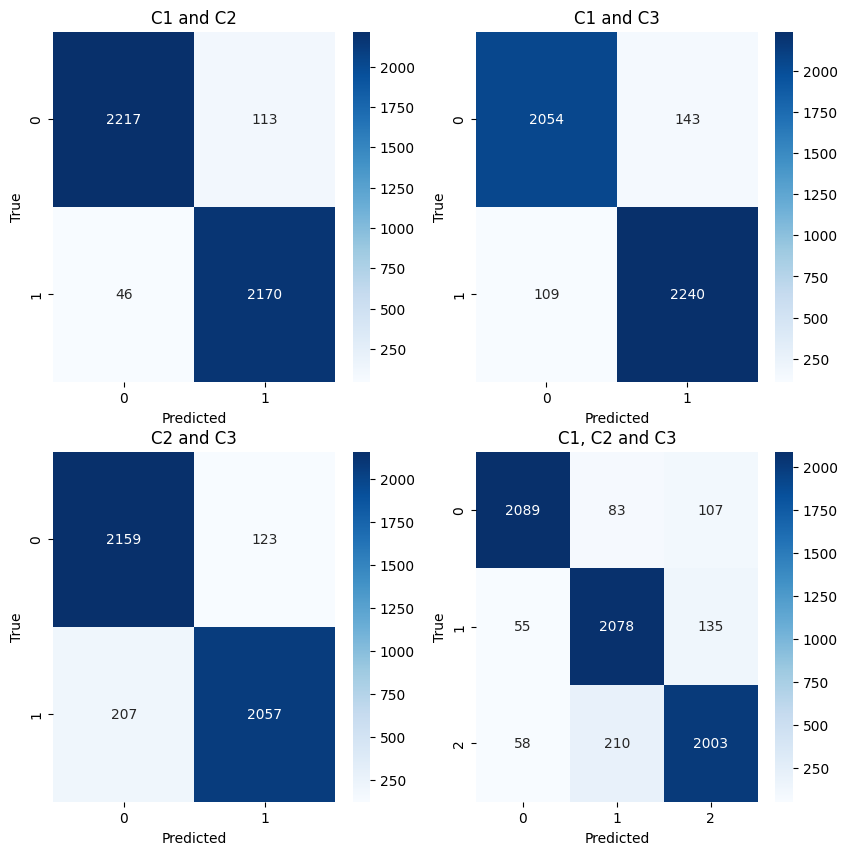

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.heatmap(c1_c2_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')
axes[0, 0].set_title('C1 and C2')
sns.heatmap(c1_c3_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')
axes[0, 1].set_title('C1 and C3')
sns.heatmap(c2_c3_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')
axes[1, 0].set_title('C2 and C3')
sns.heatmap(c123_conf_matrix, annot=True,
            fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')
axes[1, 1].set_title('C1, C2 and C3')

In [62]:
metrics_df = pd.DataFrame(metrics).T
metrics_df

,specificity,falsePositiveRate,accuracy,precision,recall
Lasso C1C2,0.742489,0.257511,0.832600,0.914860,0.742489
Lasso C1C3,0.720983,0.279017,0.665640,0.668796,0.667431
Lasso C2C3,0.907537,0.092463,0.678179,0.725353,0.677267
Lasso C123,0.749651,0.250349,0.556615,NaN,NaN
RF C1C2,0.951502,0.048498,0.965024,0.979673,0.951502
RF C1C3,0.934911,0.065089,0.944567,0.944799,0.944254
RF C2C3,0.946100,0.053900,0.927409,0.928044,0.927334
RF C123,0.961786,0.038214,0.904957,NaN,NaN


In [63]:
metrics_df['accuracy']

Lasso C1C2    0.832600
Lasso C1C3    0.665640
Lasso C2C3    0.678179
Lasso C123    0.556615
RF C1C2       0.965024
RF C1C3       0.944567
RF C2C3       0.927409
RF C123       0.904957
Name: accuracy, dtype: float64